In [ ]:
#import the required libraries
!pip install keras
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation


In [ ]:
#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


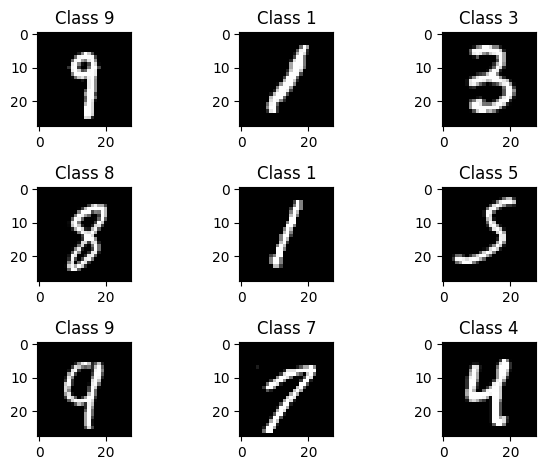

In [ ]:
# verify the dimensions of the training and testing sets.

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
# Data Preprocessing

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# convert integer class labels into one-hot encoded vectors.

import numpy as np

no_classes = 10

Y_train = np.eye(no_classes)[y_train]
Y_test = np.eye(no_classes)[y_test]

In [ ]:
#Building a 3-layer Neural Network

model = Sequential()

In [ ]:
#First Hidden Layer

model.add(Dense(512, input_shape=(784,)))

In [ ]:
#adds a Rectified Linear Unit (ReLU) activation function layer to your neural network model.

model.add(Activation('relu'))

In [ ]:
#adds a dropout layer to your neural network model. Dropout is a regularization technique commonly used in neural networks to prevent overfitting.

model.add(Dropout(0.2))

In [ ]:
#Second Hidden Layer

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
#Final Output Layer

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
#provides a summary of the neural network model, including information about the architecture, the number of parameters, and the output shape of each layer.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

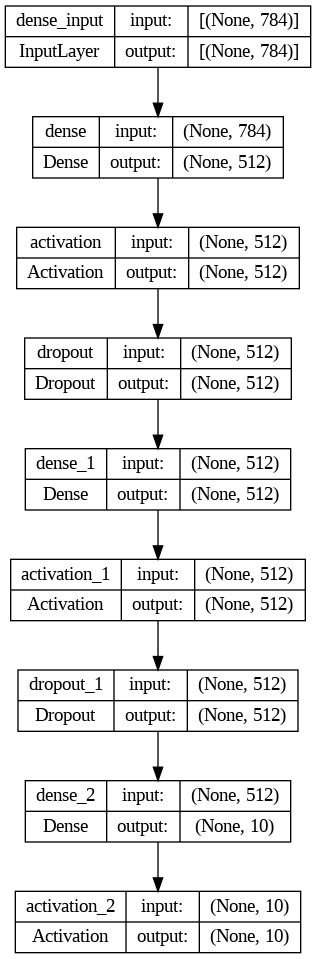

In [ ]:
#Model Chart
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [ ]:
#Compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train a neural network model using the fit() function

history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2436 - accuracy: 0.9274
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1002 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0709 - accuracy: 0.9778
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0541 - accuracy: 0.9821
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0466 - accuracy: 0.9849
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0390 - accuracy: 0.9872
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 10/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0238 - accura

In [ ]:
#Evaluate the model
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9814
Test accuracy: 0.9814000129699707


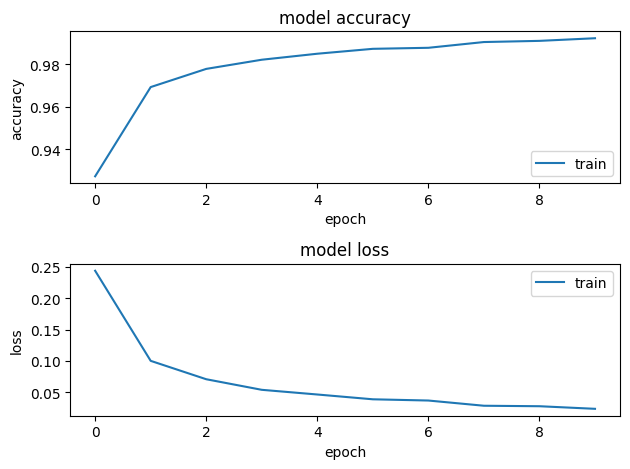

In [ ]:
#Plot the accuracy and loss metrics of the model.

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [ ]:
#generate predictions for the test data using the trained neural network model.

results = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Extract the predicted class labels based on the highest probability
predicted_classes = np.argmax(results, axis=1)

# Convert one-hot encoded labels to integer labels for comparison
true_labels = np.argmax(Y_test, axis=1)

# Find indices of correctly and incorrectly classified samples
correct_indices = np.nonzero(predicted_classes == true_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != true_labels)[0]


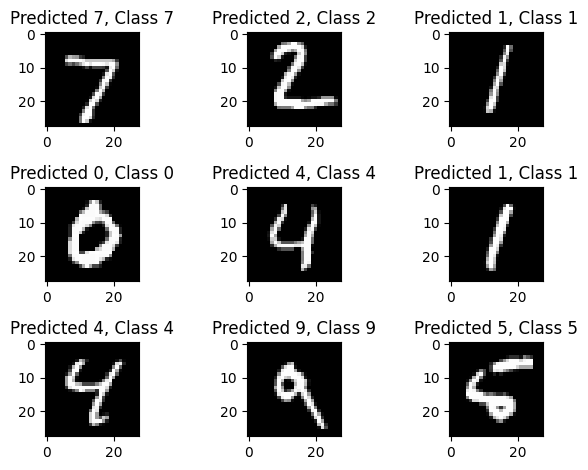

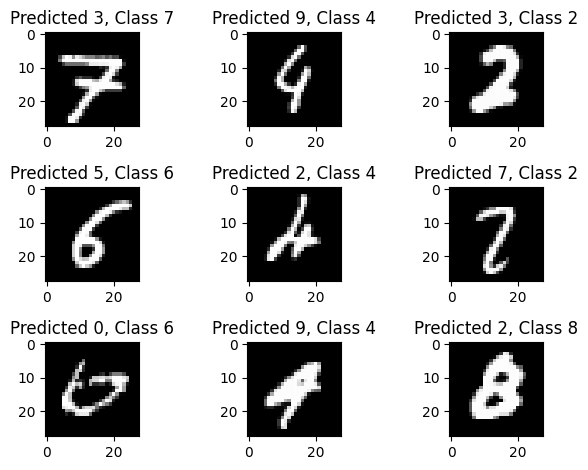

In [ ]:
# visualize the correctly and incorrectly classified samples from the test dataset.

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()